### LIBRERIAS

In [249]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

### ANALISIS EXPLORATORIO DE DATOS

In [250]:
# lectura de archivo
df = pd.read_csv('stats_survey.csv')
# revision de las primeras 3 filas
display(df.head(3))
# informacion del dataframe
display(df.info())

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          406 non-null    object 
 1   Your Sex?                                                                                          404 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 3   What year were you in last year (2023) ?                                                           333 non-null    object 
 4   What faculty does your degree fall under?                                                          399 non-null    object 

None

La columna numérica "Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)" será nuestro objetivo para clasificar

Se excluye la columna "Timestamp"  ya que corresponde a la fecha y hora que fue realizada la encuesta por lo tanto no será considerado para la creación de nuestro modelo de clasificación

In [251]:
# Se crea un nuevo dataframe excluyendo la columna timestamp
df = df.iloc[:,1:]
df.head(3)

,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close


Se procede a separar las columnas categoricas de las númericas

In [252]:
# definicion de columnas categoricas
columnas_numericas = ['Your Matric (grade 12) Average/ GPA (in %)', 'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)']
# todas las columnas restantes que no sean columnas numericas
columnas_categoricas = [x for x in list(df.columns) if x not in columnas_numericas]
display(columnas_numericas)
display(columnas_categoricas)
display(len(columnas_categoricas))

['Your Matric (grade 12) Average/ GPA (in %)',
 'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)']

['Your Sex?',
 'What year were you in last year (2023) ?',
 'What faculty does your degree fall under?',
 'Your Accommodation Status Last Year (2023)',
 'Monthly Allowance in 2023',
 'Were you on scholarship/bursary in 2023?',
 'Additional amount of studying (in hrs) per week',
 'How often do you go out partying/socialising during the week? ',
 'On a night out, how many alcoholic drinks do you consume?',
 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
 'How many modules have you failed thus far into your studies?',
 'Are you currently in a romantic relationship?',
 'Do your parents approve alcohol consumption?',
 'How strong is your relationship with your parent/s?']

14

Se procede a imputar los datos faltantes

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 16 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Your Sex?                                                                                          404 non-null    object 
 1   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 2   What year were you in last year (2023) ?                                                           333 non-null    object 
 3   What faculty does your degree fall under?                                                          399 non-null    object 
 4   Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                 320 non-null    float64

Se usan dos estrategias:  1. Para los datos numericos se utiliza la media, 2. Para los datos categoricos se utiliza la moda

In [254]:

# para los datos faltantes vamos a completar con el promdio de los mismos, se decide rellenar los dato de esta manera debido a que apartir de los analsisi anterior se evidencia que los encuestados mantienen un promedio similar 
df[columnas_numericas] = df[columnas_numericas].fillna(df[columnas_numericas].median())

# Imputar valores faltantes en columnas categóricas con la moda
df[columnas_categoricas] = df[columnas_categoricas].fillna(df[columnas_categoricas].mode().iloc[0])

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 16 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Your Sex?                                                                                          406 non-null    object 
 1   Your Matric (grade 12) Average/ GPA (in %)                                                         406 non-null    float64
 2   What year were you in last year (2023) ?                                                           406 non-null    object 
 3   What faculty does your degree fall under?                                                          406 non-null    object 
 4   Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                 406 non-null    float64

Análisis de datos categoricos

Se crean grupos para poder visualizar de mejor manera las variables categoricas

In [256]:
grupo_uno = columnas_categoricas[:6]
grupo_dos = columnas_categoricas[6:12]
grupo_tres = columnas_categoricas[12:14]
display(grupo_uno)
display(len(grupo_uno))
display(grupo_dos)
display(len(grupo_dos))
display(grupo_tres)
display(len(grupo_tres))

['Your Sex?',
 'What year were you in last year (2023) ?',
 'What faculty does your degree fall under?',
 'Your Accommodation Status Last Year (2023)',
 'Monthly Allowance in 2023',
 'Were you on scholarship/bursary in 2023?']

6

['Additional amount of studying (in hrs) per week',
 'How often do you go out partying/socialising during the week? ',
 'On a night out, how many alcoholic drinks do you consume?',
 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
 'How many modules have you failed thus far into your studies?',
 'Are you currently in a romantic relationship?']

6

['Do your parents approve alcohol consumption?',
 'How strong is your relationship with your parent/s?']

2

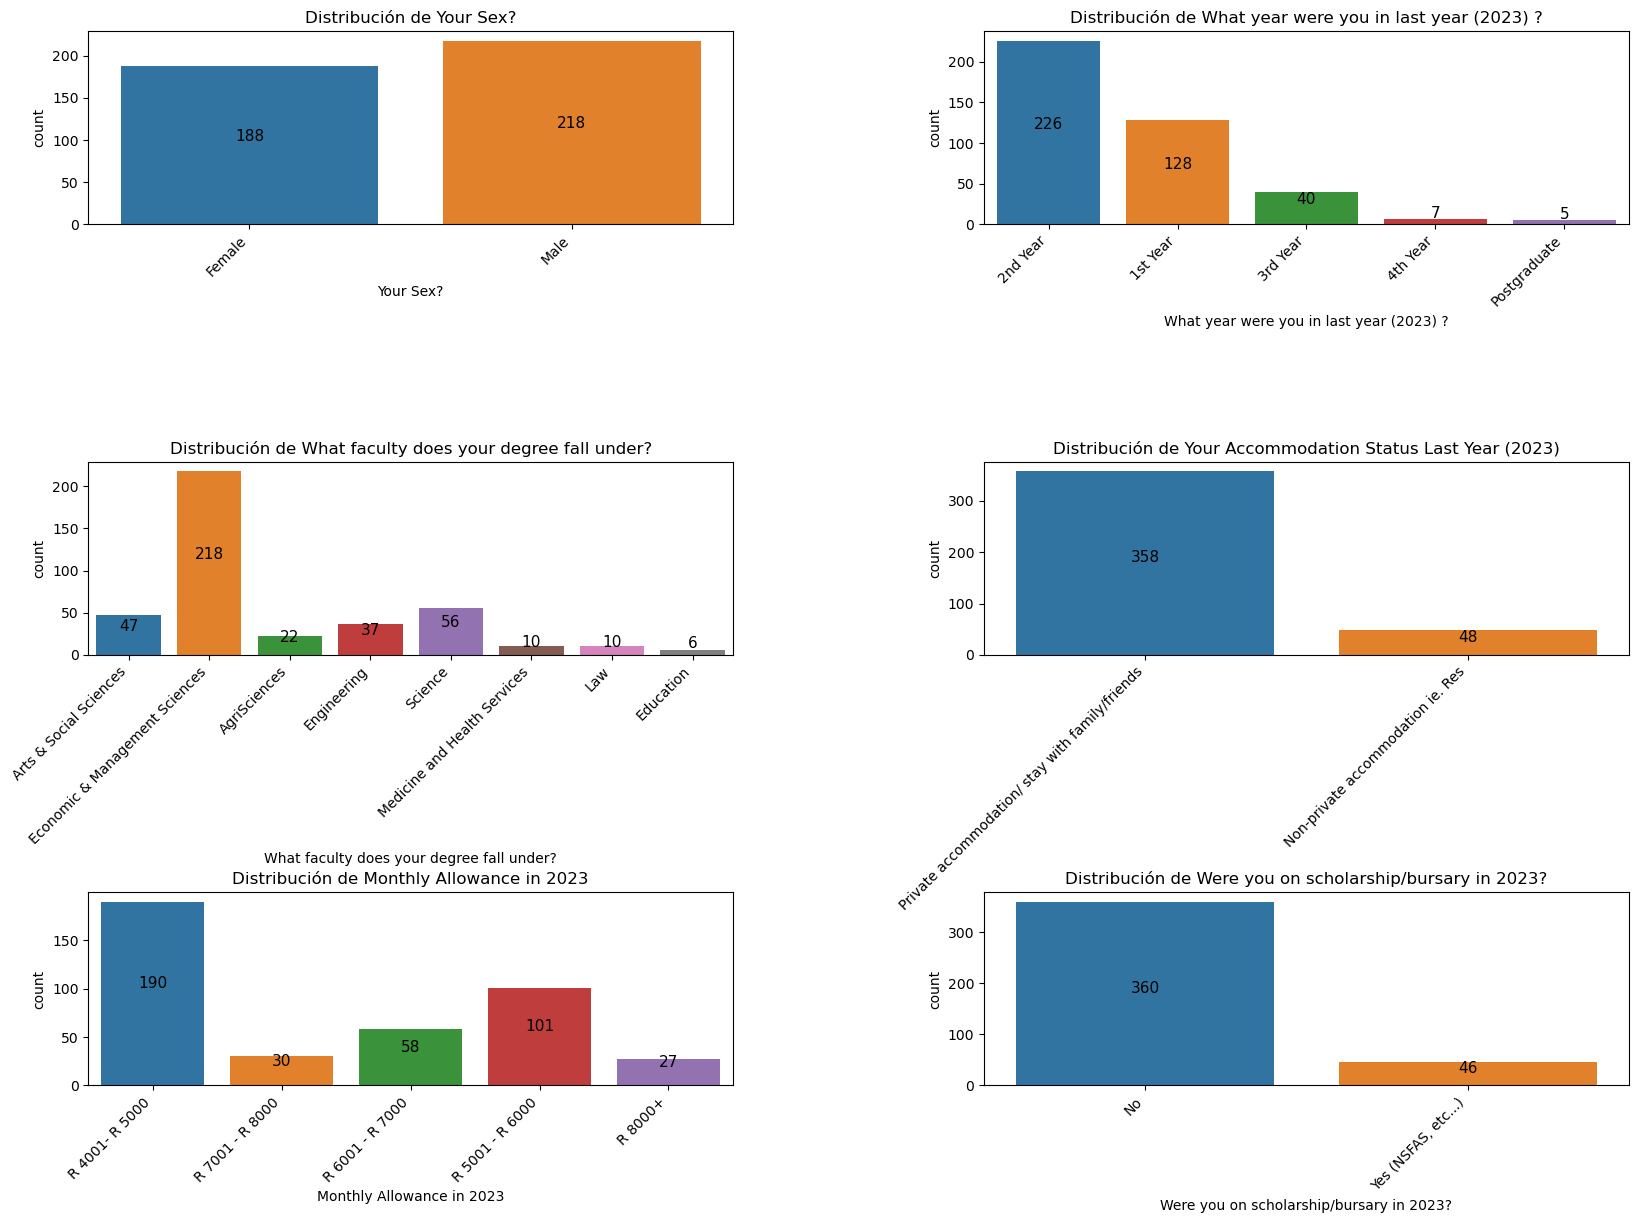

In [257]:
# Suprimir todos los warnings
warnings.filterwarnings('ignore')
# Configuración de la figura y la cuadrícula de subgráficas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=15.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_uno):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    if var in df.columns:
        sns.countplot(x=var, data=df, ax=ax)
        ax.set_title(f'Distribución de {var}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )
plt.show()


A partir de las graficas anteriores podemos notar los siguientes puntos:
- La mayoria de encuestados es de genero masculino
- La mayoria de encuestados en el 2023 eran de segundo y primer año
- La mayoria de encuestados pertenecen a la facultad de Ciencias económicas y de gestión 
- La mayoria de encuestados viven con familiares
- El dinero destinado mensualmenten a los encuestados esta en el rango de 4001 - 5001 rands que realizando la conversion a dolares a la fecha equivale a 224.34 a 280.41
- La mayoria de encuestados no tenian beca en el 2023


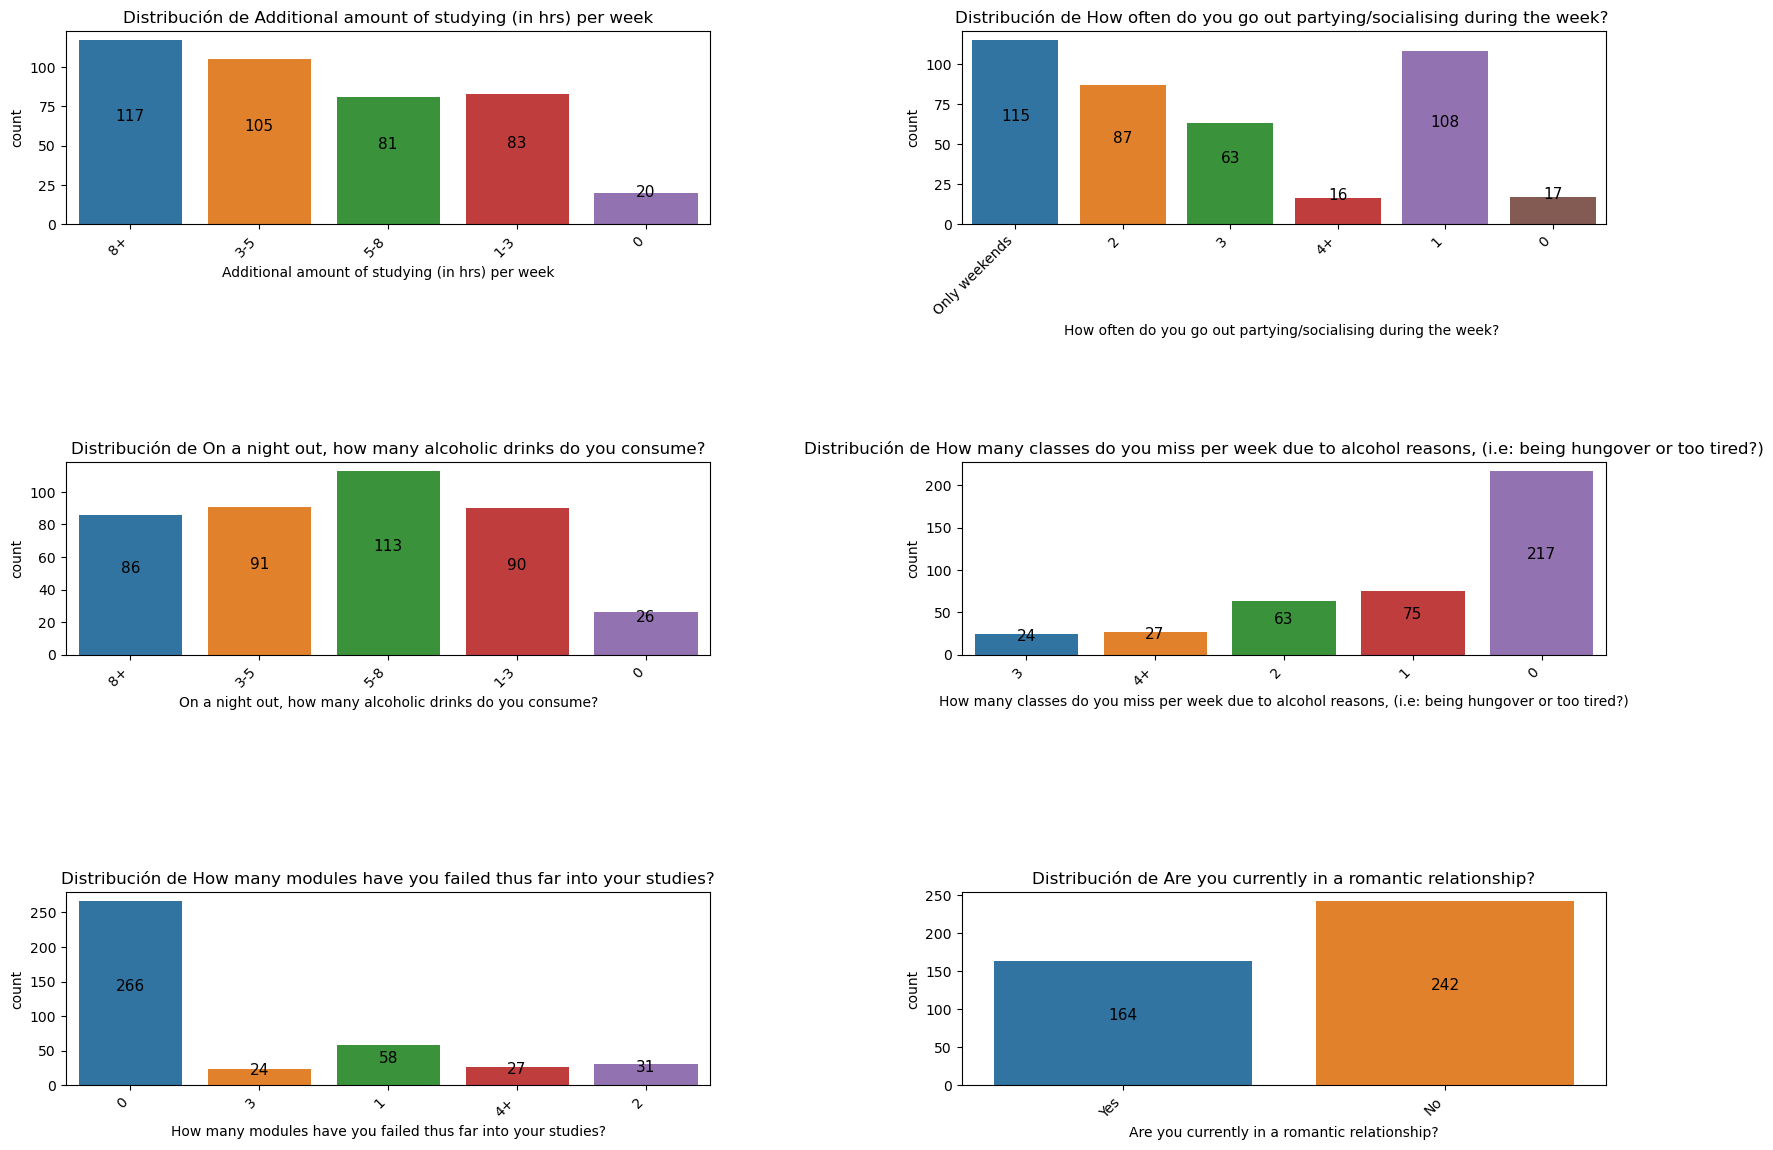

In [258]:
# Suprimir todos los warnings
warnings.filterwarnings('ignore')
# Configuración de la figura y la cuadrícula de subgráficas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=15.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_dos):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    if var in df.columns:
        sns.countplot(x=var, data=df, ax=ax)
        ax.set_title(f'Distribución de {var}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )
plt.show()

A partir de las graficas anteriores podemos notar los siguientes puntos:
- La mayoria de encuestados destinan mas de 8 horas adicionales en estudio
- La mayoria de encuestados solo salen el fin de semana , el segundo grupo mas grande sale 1 vez a la semana, esto puede ser a casusa que exiten estudiantes que el año anterior eran de primer año por lo tanto se enfocaban mucho mas a sus estudios
- La mayoria de encuestados beben entre 5 y 8 bebidas alcoholicas, existe un valor simiar entre los siguientes tres grupos: mas de 8 bebidas, 3 a 5 bebidas y 1 a 3 bebidas
- La mayoria de encuestados no faltaban a clases a causa del consumo de alcohol, de igual manera , esto puede ser a causa que exiten estudiantes que el año anterior eran de primer año por lo tanto se enfocaban mucho mas a sus estudios
- La mayoria de encuestados no perdieron algun modulo, de igual manera , esto puede ser a casusa que exiten estudiantes que el año anterior eran de primer año por lo tanto se enfocaban mucho mas a sus estudios
- La mayoria de encuestados no tienen una relación sentimental se puede inducir que el consumo de alcohol es debido a eventos sociales, fiestas, reuniones, entre otros.

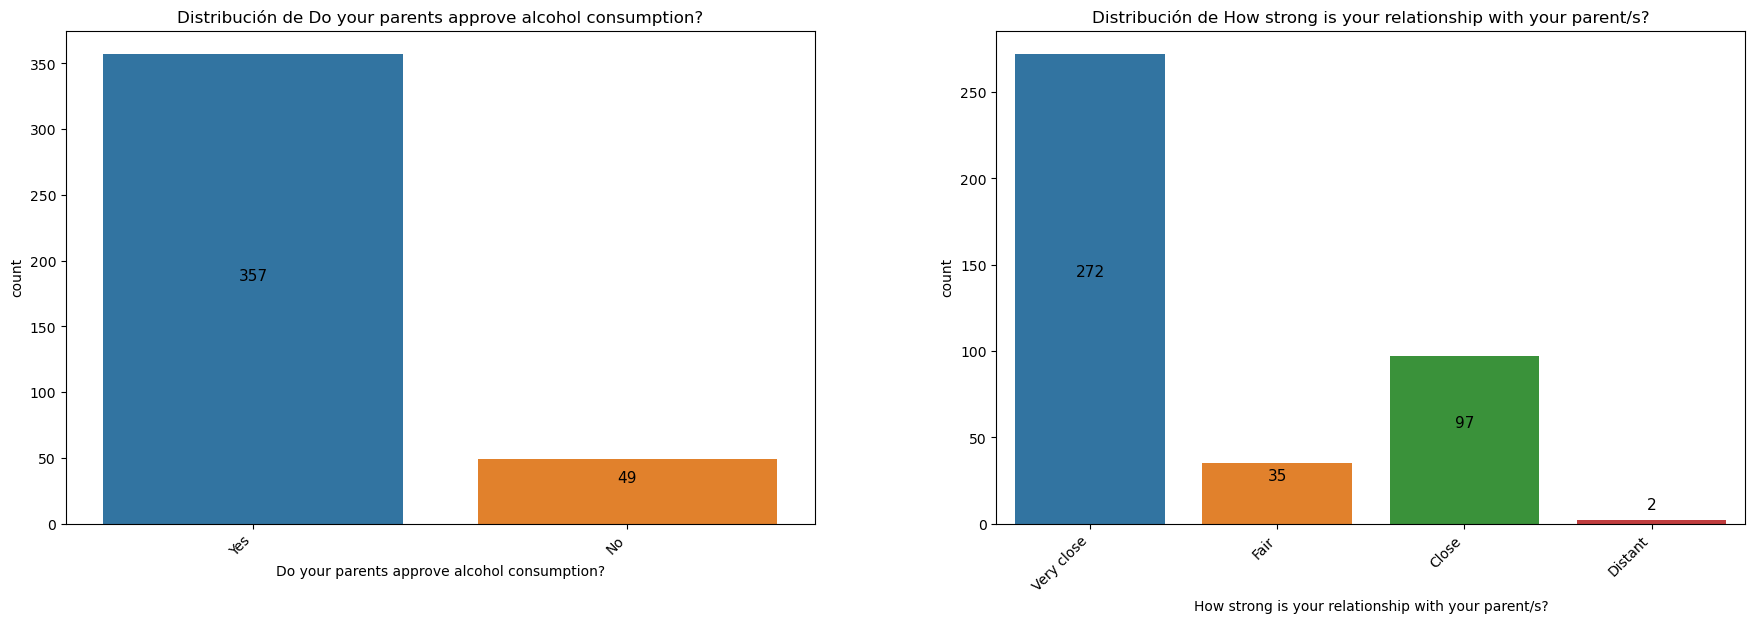

In [259]:

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

# Configuración de la figura para dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=10.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_tres):
    ax = axes[i]
    sns.countplot(x=var, data=df, ax=ax)
    ax.set_title(f'Distribución de {var}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )

plt.show()


A partir de las graficas anteriores podemos notar los siguientes puntos:
- La mayoria de encuestados tienen consendimiento de sus padres para ingerir alcohol
- La mayoria de encuestados tienen una relación muy cercana con sus padres 

Se procede a analizar nuestras variables categoricas con nuestra variable objetivo

Promedios

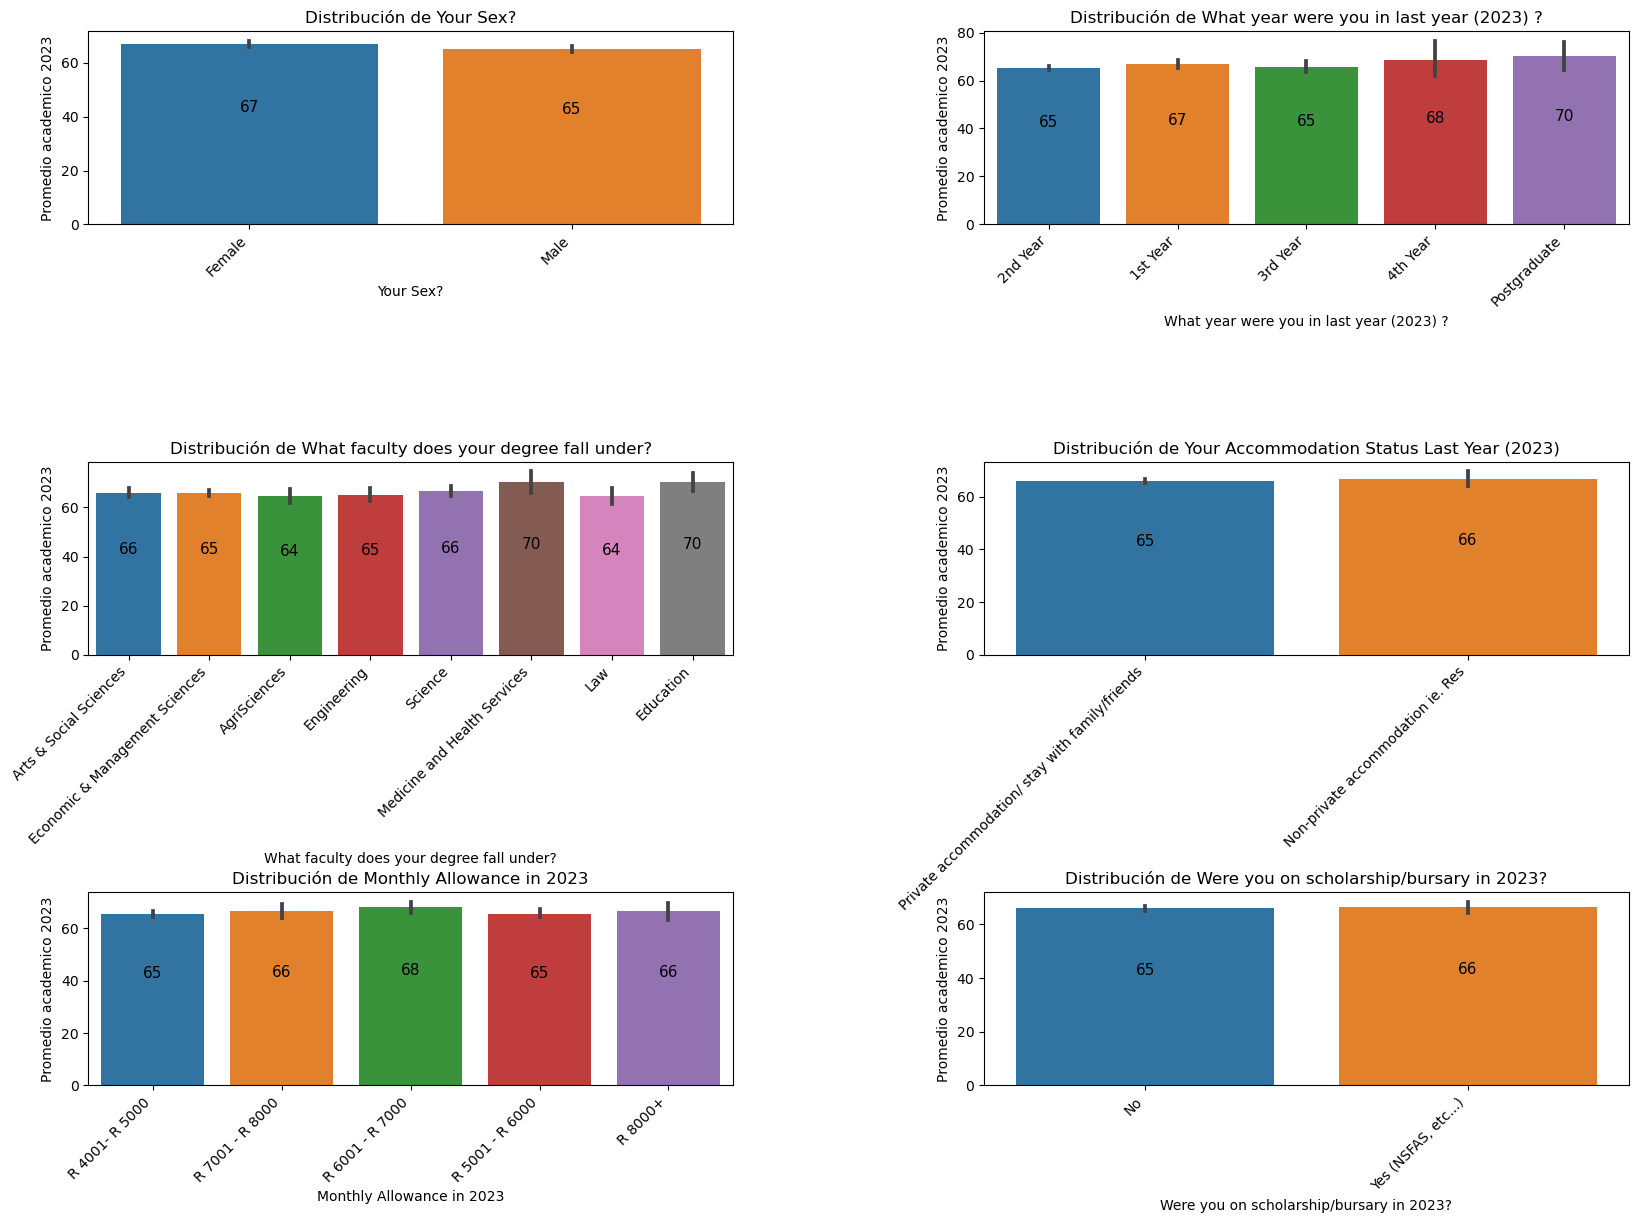

In [260]:
# Suprimir todos los warnings
warnings.filterwarnings('ignore')
# Configuración de la figura y la cuadrícula de subgráficas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=15.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_uno):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    if var in df.columns:
        sns.barplot(x=var, y=columnas_numericas[1], data=df, ax=ax)
        ax.set_title(f'Distribución de {var}')
        ax.set_ylabel("Promedio academico 2023")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )
plt.show()

A partir de las graficas anteriores podemos notar los siguientes puntos:
- En todas las graficas vemos un promedio similar esto indica que entre los diferentes grupos que existen los estudiantes se mantienen en un rango moderado de notas

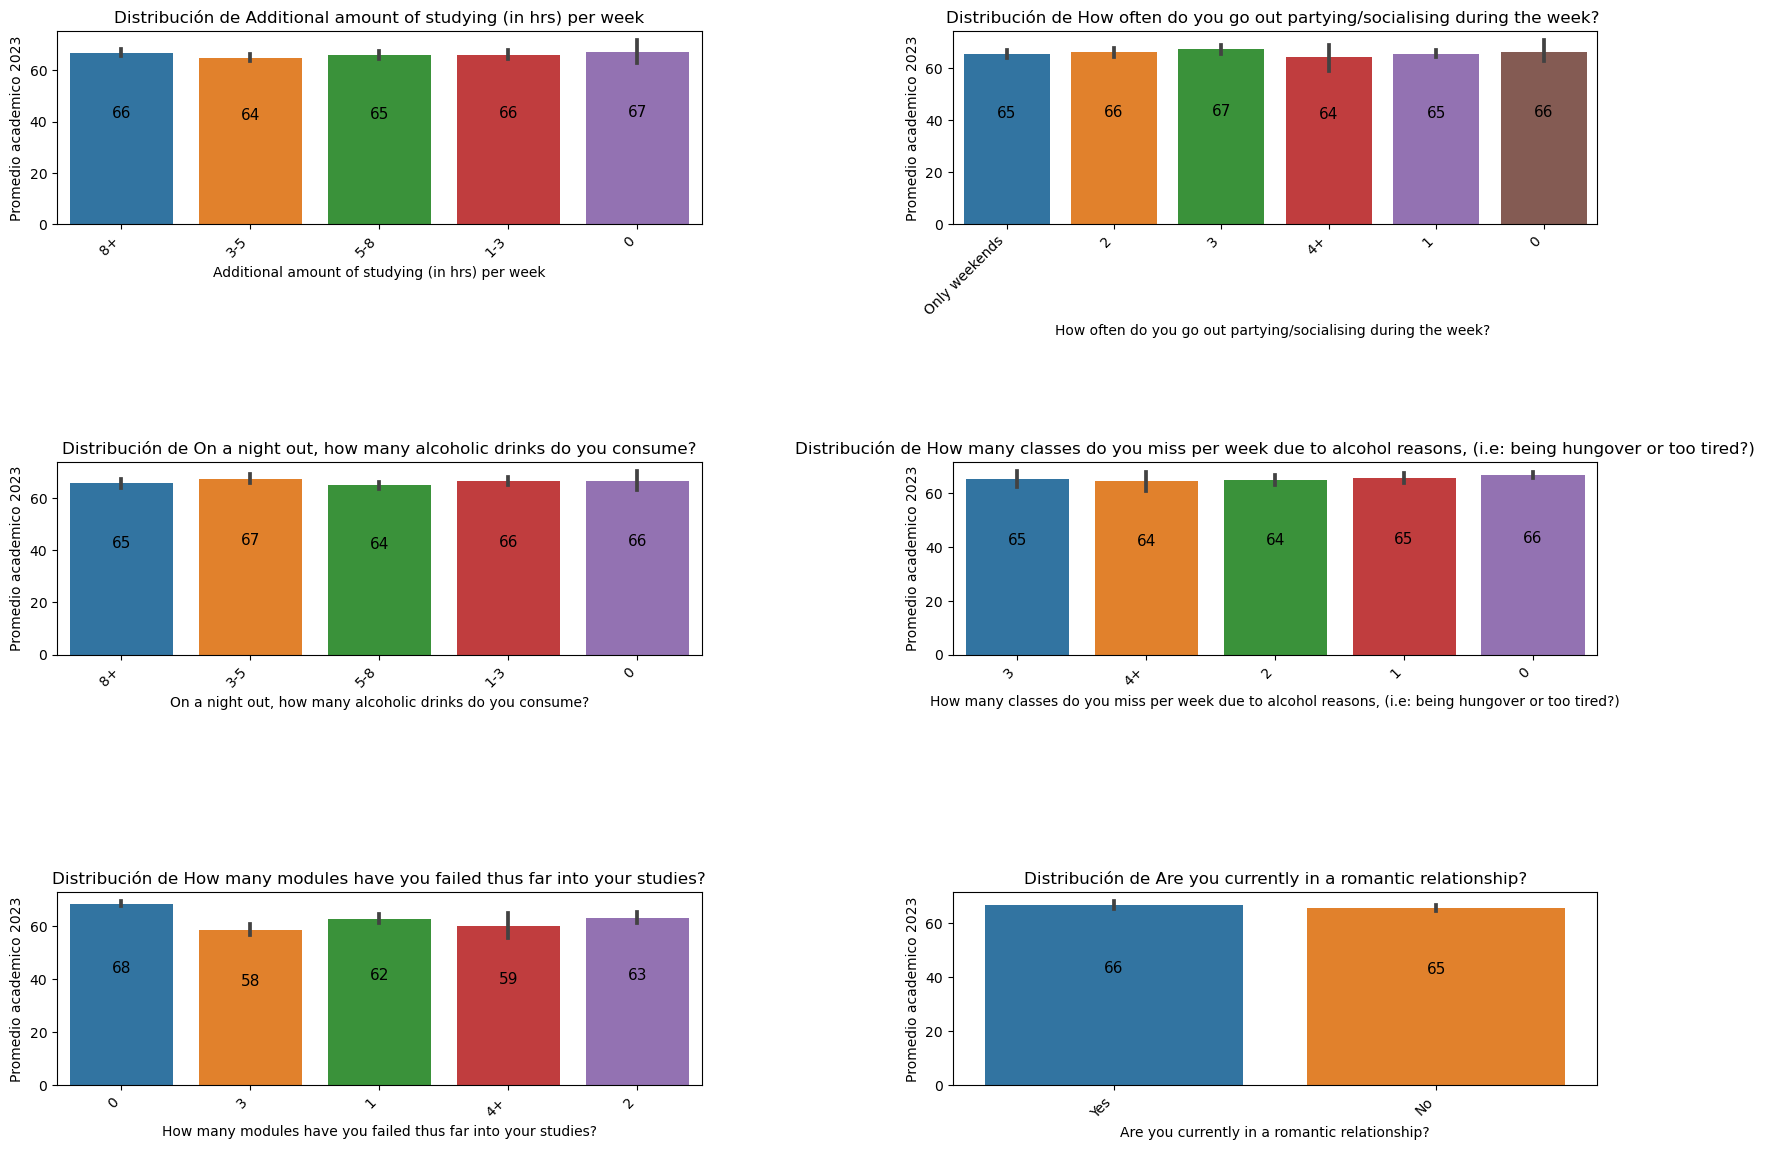

In [261]:
# Suprimir todos los warnings
warnings.filterwarnings('ignore')
# Configuración de la figura y la cuadrícula de subgráficas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=15.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_dos):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    if var in df.columns:
        sns.barplot(x=var, y=columnas_numericas[1], data=df, ax=ax)
        ax.set_title(f'Distribución de {var}')
        ax.set_ylabel("Promedio academico 2023")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )
plt.show()

A partir de las graficas anteriores podemos notar los siguientes puntos:
- En todas las graficas vemos un promedio similar esto indica que entre los diferentes grupos que existen los estudiantes se mantienen en un rango moderado de notas

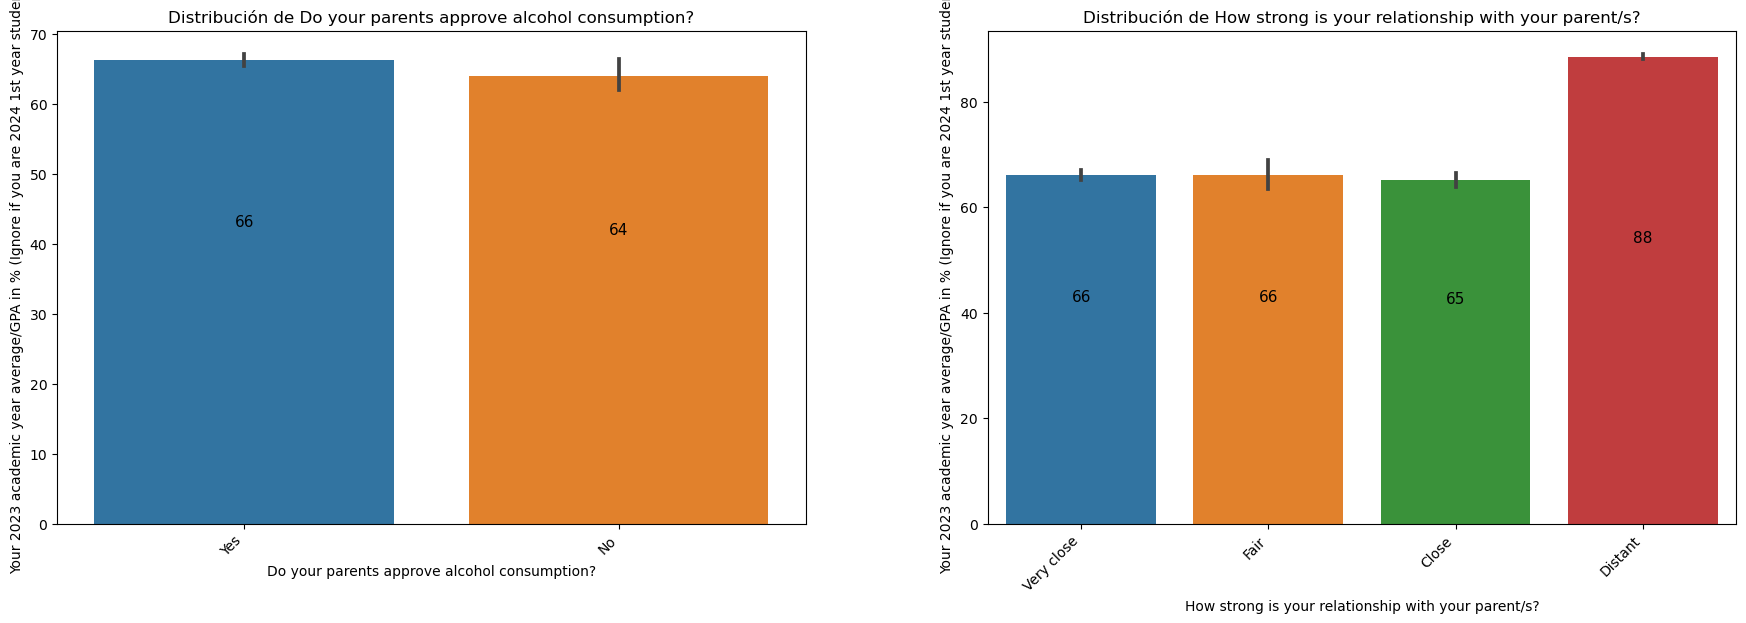

In [262]:

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

# Configuración de la figura para dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=10.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_tres):
    ax = axes[i]
    sns.barplot(x=var, y=columnas_numericas[1], data=df, ax=ax)
    ax.set_title(f'Distribución de {var}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )

plt.show()


Se procede a relacionar las variables categoricas con el año anterior cursado

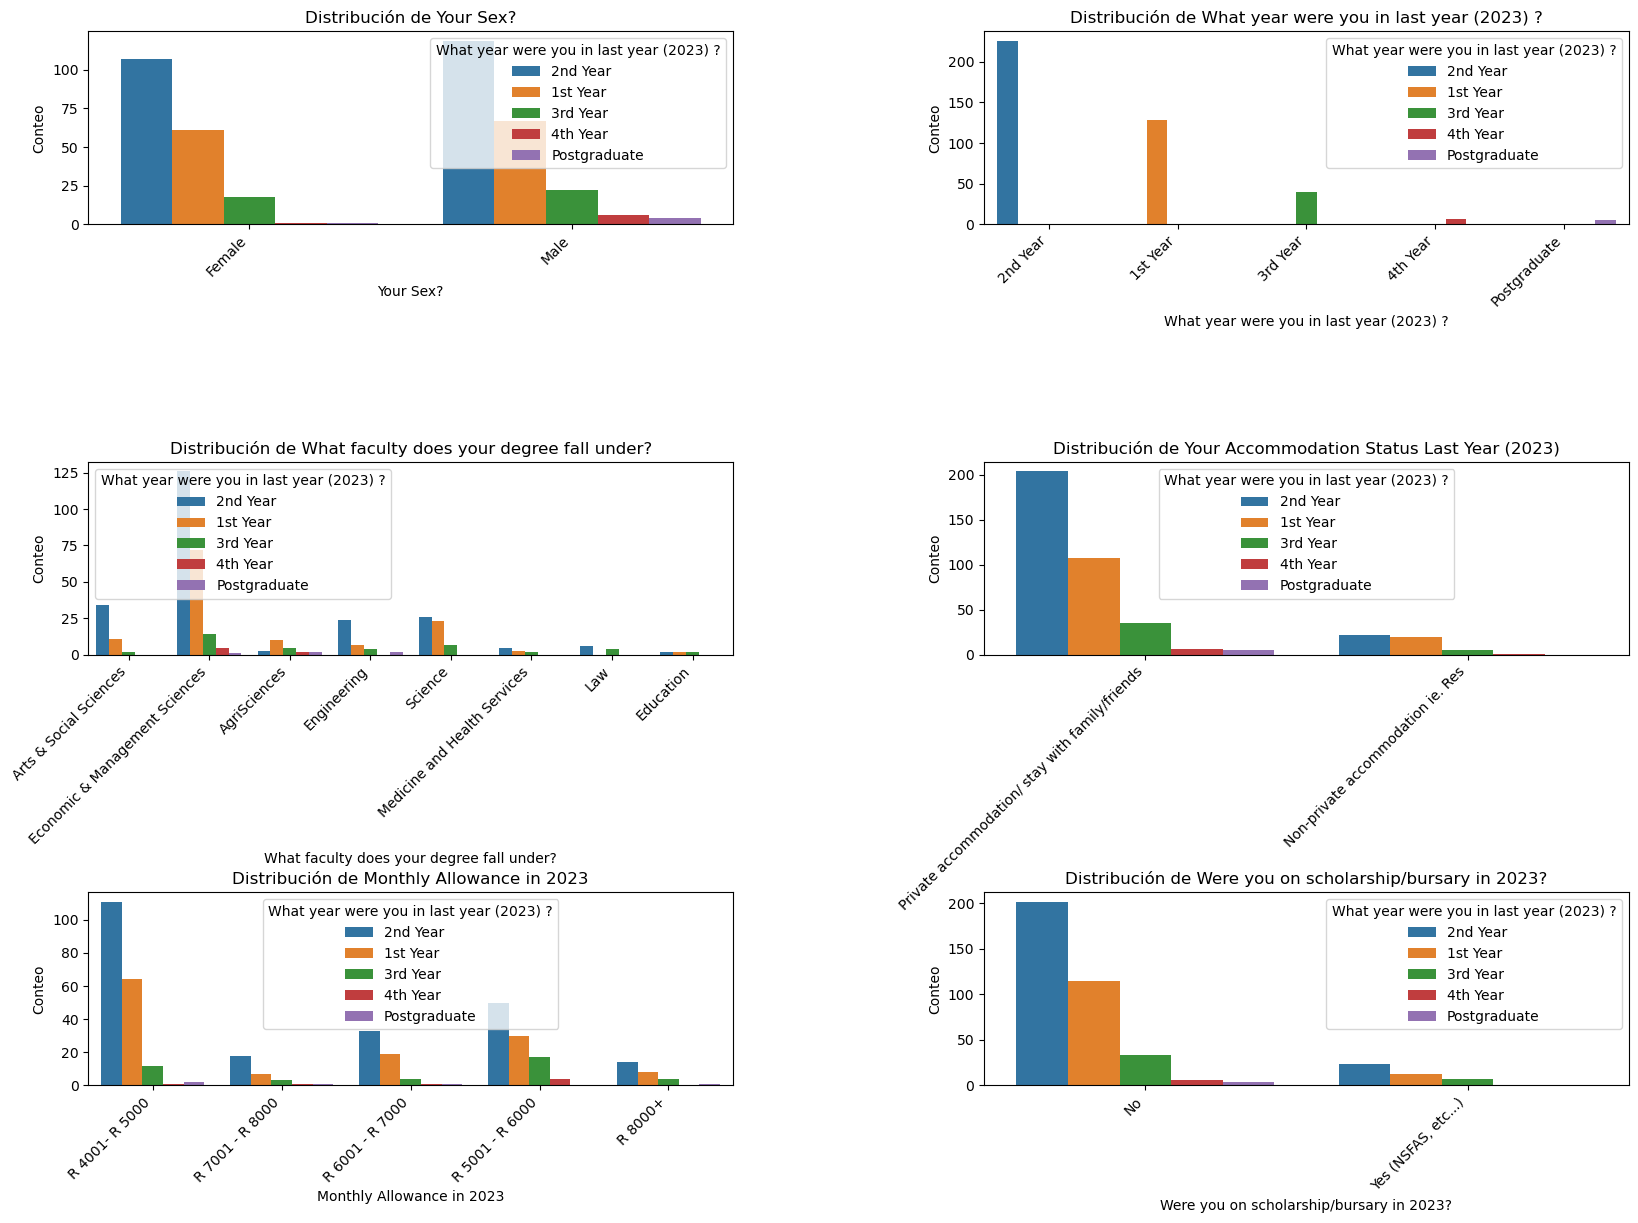

In [263]:

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

# Configuración de la figura y la cuadrícula de subgráficas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=15.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_uno):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    if var in df.columns:
        sns.countplot(x=var, hue=columnas_categoricas[1], data=df, ax=ax)
        ax.set_title(f'Distribución de {var}')
        ax.set_ylabel("Conteo")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()



In [264]:

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

# Configuración de la figura y la cuadrícula de subgráficas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=15.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_dos):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    if var in df.columns:
        sns.countplot(x=var, hue=columnas_categoricas[1], data=df, ax=ax)
        ax.set_title(f'Distribución de {var}')
        ax.set_ylabel("Conteo")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()



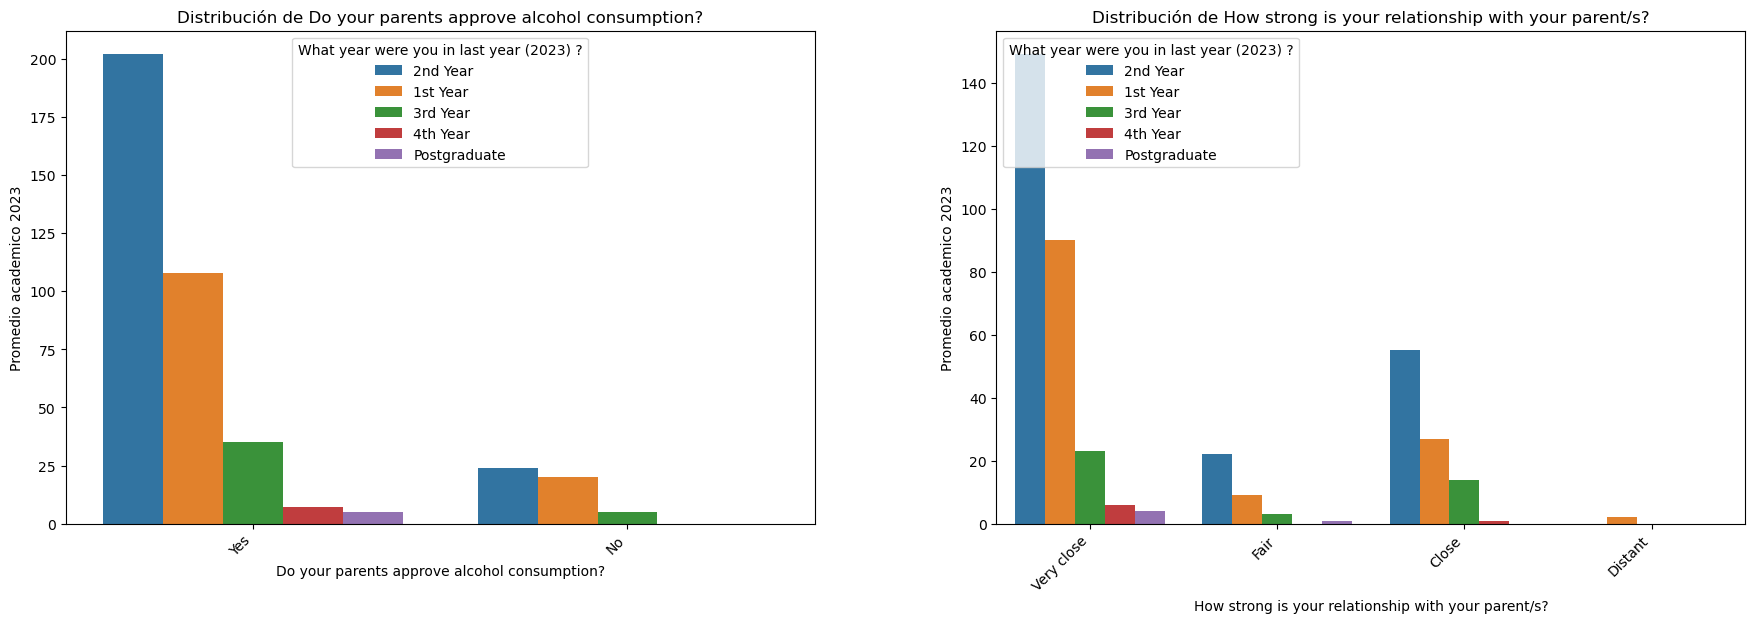

In [ ]:
# Suprimir todos los warnings
warnings.filterwarnings('ignore')

# Configuración de la figura para dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=10.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_tres):
    ax = axes[i]
    # Crear un gráfico de caja
    #sns.boxplot(x=var, y=columnas_numericas[1], hue=columnas_categoricas[1], data=df, ax=ax)
    #sns.violinplot(x=var, y=columnas_numericas[1], hue=columnas_categoricas[1], data=df, split=False)
    #sns.barplot(x=var, y=columnas_numericas[1], hue=columnas_categoricas[1], data=df, ax=ax)
    #sns.barplot(x=var, y=columnas_numericas[1], data=df, ax=ax)
    sns.countplot(x=var, hue=columnas_categoricas[1], data=df, ax=ax)
    ax.set_title(f'Distribución de {var}')
    ax.set_ylabel("Promedio academico 2023")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


plt.show()

A partir de las tres gracias obtenidas, es evidente que la poblicación de la encuestra se centro en estudiantes de 1ero y 2do año lo que podria no favorecer al querer clasificar una nueva entrada

Análisis de datos numericos

In [ ]:
df['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)'].describe()

count    406.000000
mean      65.999778
std        8.135325
min       30.000000
25%       61.000000
50%       65.000000
75%       70.000000
max       95.220000
Name: Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student), dtype: float64

A partir de los resultados se puede concluir:
- La media de 66 y la mediana de 65 indican que los datos están relativamente centrados alrededor de esos valores.
- La desviación estándar de 8.135 sugiere que, aunque la mayoría de los valores están relativamente cerca de la media, hay cierta dispersión en los datos.
- La asimetría no parece ser muy pronunciada, dado que la media y la mediana son muy cercanas.
- Los cuartiles indican que la mayoría de los valores se encuentran entre 61 y 70, lo que sugiere que el 50% de los datos están en este rango.


Para reforzar el analisis se realiza un analisis de normalidad

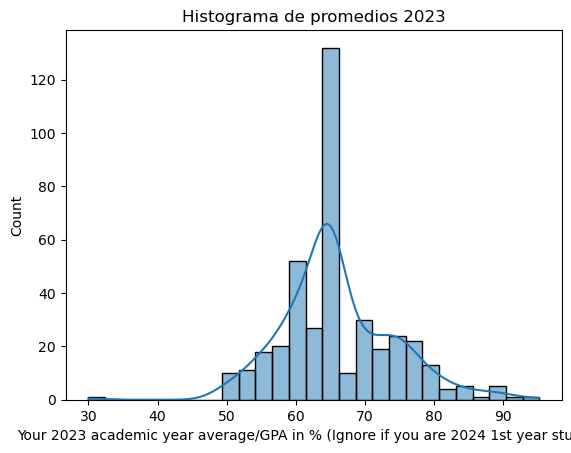

In [ ]:

# Suprimir todos los warnings
warnings.filterwarnings('ignore')
# Configuración de la figura para dos subplots en una fila
sns.histplot(data=df, x=columnas_numericas[1], kde=True)
# Añadir el título al gráfico
plt.title("Histograma de promedios 2023")
plt.show()

1.282916565081976

0.4158823910091246

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


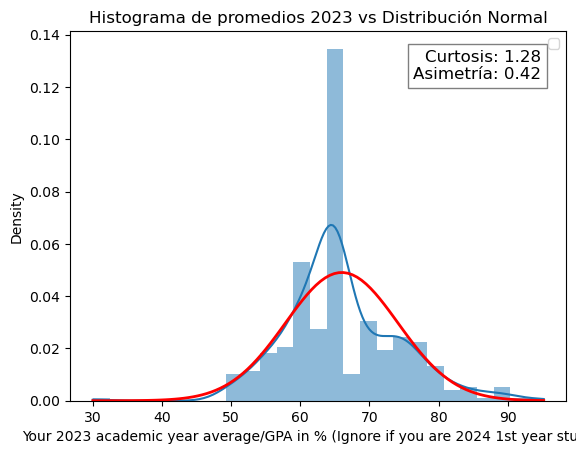

In [ ]:
# Suprimir todos los warnings
warnings.filterwarnings('ignore')

# Crear el histograma con KDE (Kernel Density Estimate)
sns.histplot(data=df, x=columnas_numericas[1], kde=True, stat="density", linewidth=0)

# Obtener la media y desviación estándar de los datos
mean = df[columnas_numericas[1]].mean()
std = df[columnas_numericas[1]].std()

# Generar valores x para la curva normal
x = np.linspace(df[columnas_numericas[1]].min(), df[columnas_numericas[1]].max(), 100)

# Calcular los valores de la distribución normal
normal_curve = norm.pdf(x, mean, std)

# Superponer la curva normal al gráfico
plt.plot(x, normal_curve, color='red', lw=2)

# Calcular la curtosis y la asimetría (skewness)
kurt = kurtosis(df[columnas_numericas[1]])
skewness = skew(df[columnas_numericas[1]])

display(kurt)
display(skewness)

# Añadir el título al gráfico
plt.title("Histograma de promedios 2023 vs Distribución Normal")

# Añadir la leyenda
plt.legend()

# Añadir la curtosis y la asimetría en la parte superior derecha del gráfico
plt.text(0.95, 0.95, f'Curtosis: {kurt:.2f}\nAsimetría: {skewness:.2f}',
         transform=plt.gca().transAxes,
         fontsize=12,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

# Mostrar el gráfico
plt.show()


- Una curtosis de 1.28 indica que la distribución de tus datos tiene colas más ligeras y una menor concentración en el centro que una distribución normal. Esto sugiere que hay menos valores extremos (outliers) y que los datos están más dispersos alrededor de la media.
- Una asimetría de 0.42 indica que la distribución está ligeramente sesgada hacia la derecha (cola más larga a la derecha). Esto significa que hay un número relativamente pequeño de observaciones con valores superiores al promedio que estiran la distribución hacia la derecha.

Preprocesamiento de datos

  Preparacion de datos categoricos
    
- Categóricas Nominales: las variables categóricas nominales son aquellas que representan categorías sin un orden específico. Aquí se agrupan los datos en categorías distintas sin implicar una jerarquía.

- Categóricas Ordinales: las variables categóricas ordinales tienen un orden implícito entre las categorías. Aquí está una posible clasificación


In [ ]:
columnas_categoricas

['Your Sex?',
 'What year were you in last year (2023) ?',
 'What faculty does your degree fall under?',
 'Your Accommodation Status Last Year (2023)',
 'Monthly Allowance in 2023',
 'Were you on scholarship/bursary in 2023?',
 'Additional amount of studying (in hrs) per week',
 'How often do you go out partying/socialising during the week? ',
 'On a night out, how many alcoholic drinks do you consume?',
 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
 'How many modules have you failed thus far into your studies?',
 'Are you currently in a romantic relationship?',
 'Do your parents approve alcohol consumption?',
 'How strong is your relationship with your parent/s?']

Categóricas Nominales
- Your Sex?
    -  Ejemplo de valores: 'Female', 'Male'
    - Tipo: Categórica nominal
- What faculty does your degree fall under?
    - Ejemplo de valores: 'Arts & Social Sciences', 'Economic & Management Sciences', 'Engineering', 'AgriSciences'
    - Tipo: Categórica nominal
- Your Accommodation Status Last Year (2023)
    - Ejemplo de valores: 'Private accommodation/ stay with family/friends'
    - Tipo: Categórica nominal
- Were you on scholarship/bursary in 2023?
    - Ejemplo de valores: 'No', 'Yes (NSFAS, etc...)'
    - Tipo: Categórica nominal
- Are you currently in a romantic relationship?
    - Ejemplo de valores: 'Yes', 'No'
    - Tipo: Categórica nominal
- Do your parents approve alcohol consumption?
    - Ejemplo de valores: 'Yes', 'No'
    - Tipo: Categórica nominal

Categóricas Ordinales

- What year were you in last year (2023)?
    - Ejemplo de valores: '1st Year', '2nd Year'
    - Tipo: Categórica ordinal (hay un orden implícito en los años de estudio)
- Monthly Allowance in 2023
    - Ejemplo de valores: 'R 4001- R 5000', 'R 7001 - R 8000'
    - Tipo: Categórica ordinal (los rangos de cantidad tienen un orden implícito)
- Additional amount of studying (in hrs) per week
    - Ejemplo de valores: '8+', '3-5'
    - Tipo: Categórica ordinal (las categorías indican rangos con un orden implícito)
- How often do you go out partying/socialising during the week?
    - Ejemplo de valores: 'Only weekends', '2', '3'
    - Tipo: Categórica ordinal (si las respuestas representan un orden de frecuencia, como 'Sólo fines de semana', '2 veces', '3 veces', etc.)
- On a night out, how many alcoholic drinks do you consume?
    - Ejemplo de valores: '8+', '3-5'
    - Tipo: Categórica ordinal (los rangos tienen un orden implícito)
- How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)
    - Ejemplo de valores: '3', '4+'
    - Tipo: Categórica ordinal (los números indican una cantidad con un orden implícito)
- How many modules have you failed thus far into your studies?
    - Ejemplo de valores: '0', '3'
    - Tipo: Categórica ordinal (los números indican un rango con un orden implícito)
- How strong is your relationship with your parent/s?
    - Ejemplo de valores: 'Very close', 'Fair'
    - Tipo: Categórica ordinal (las respuestas indican un nivel de cercanía con un orden implícito)

Separamos en nominales y ordinales

In [ ]:
columnas_categoricas_nominales = [
    'Your Sex?',
       'What faculty does your degree fall under?',
      'Your Accommodation Status Last Year (2023)',
      'Were you on scholarship/bursary in 2023?',
      'Are you currently in a romantic relationship?',
       'Do your parents approve alcohol consumption?',
]
columnas_categoricas_ordinales = [x for x in columnas_categoricas if x not in columnas_categoricas_nominales]

display(columnas_categoricas_nominales)
display(columnas_categoricas_ordinales)


['Your Sex?',
 'What faculty does your degree fall under?',
 'Your Accommodation Status Last Year (2023)',
 'Were you on scholarship/bursary in 2023?',
 'Are you currently in a romantic relationship?',
 'Do your parents approve alcohol consumption?']

['What year were you in last year (2023) ?',
 'Monthly Allowance in 2023',
 'Additional amount of studying (in hrs) per week',
 'How often do you go out partying/socialising during the week? ',
 'On a night out, how many alcoholic drinks do you consume?',
 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
 'How many modules have you failed thus far into your studies?',
 'How strong is your relationship with your parent/s?']

In [ ]:
# nuevo dataframe con las columnas nomiales y ordinales 
df = df[columnas_categoricas_nominales + columnas_categoricas_ordinales + [columnas_numericas[1]]]
df

,Your Sex?,What faculty does your degree fall under?,Your Accommodation Status Last Year (2023),Were you on scholarship/bursary in 2023?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,What year were you in last year (2023) ?,Monthly Allowance in 2023,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,How strong is your relationship with your parent/s?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)
0,Female,Arts & Social Sciences,Private accommodation/ stay with family/friends,No,Yes,Yes,2nd Year,R 4001- R 5000,8+,Only weekends,8+,3,0,Very close,72.0
1,Male,Economic & Management Sciences,Private accommodation/ stay with family/friends,"Yes (NSFAS, etc...)",No,Yes,2nd Year,R 7001 - R 8000,8+,Only weekends,3-5,4+,0,Very close,75.0
2,Male,AgriSciences,Private accommodation/ stay with family/friends,No,No,Yes,1st Year,R 4001- R 5000,3-5,2,8+,3,0,Very close,55.0
3,Male,Engineering,Private accommodation/ stay with family/friends,No,Yes,Yes,2nd Year,R 6001 - R 7000,3-5,3,8+,2,0,Very close,84.0
4,Female,Arts & Social Sciences,Private accommodation/ stay with family/friends,No,No,Yes,2nd Year,R 4001- R 5000,3-5,Only weekends,5-8,1,3,Fair,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Female,Science,Private accommodation/ stay with family/friends,No,No,Yes,2nd Year,R 4001- R 5000,3-5,3,1-3,0,0,Close,65.0
402,Female,Economic & Management Sciences,Private accommodation/ stay with family/friends,"Yes (NSFAS, etc...)",Yes,Yes,2nd Year,R 6001 - R 7000,5-8,1,8+,0,0,Very close,58.0
403,Female,Economic & Management Sciences,Private accommodation/ stay with family/friends,No,No,Yes,1st Year,R 4001- R 5000,5-8,2,3-5,1,0,Very close,65.0
404,Male,Economic & Management Sciences,Private accommodation/ stay with family/friends,No,No,Yes,2nd Year,R 4001- R 5000,1-3,4+,5-8,4+,0,Close,65.0


In [ ]:
display(df[columnas_categoricas_ordinales[0]].value_counts())
display(df[columnas_categoricas_ordinales[1]].value_counts())
display(df[columnas_categoricas_ordinales[2]].value_counts())
display(df[columnas_categoricas_ordinales[3]].value_counts())
display(df[columnas_categoricas_ordinales[4]].value_counts())
display(df[columnas_categoricas_ordinales[5]].value_counts())
display(df[columnas_categoricas_ordinales[6]].value_counts())
display(df[columnas_categoricas_ordinales[7]].value_counts())

What year were you in last year (2023) ?
2nd Year        226
1st Year        128
3rd Year         40
4th Year          7
Postgraduate      5
Name: count, dtype: int64

Monthly Allowance in 2023
R 4001- R 5000     190
R 5001 - R 6000    101
R 6001 - R 7000     58
R 7001 - R 8000     30
R 8000+             27
Name: count, dtype: int64

Additional amount of studying (in hrs) per week
8+     117
3-5    105
1-3     83
5-8     81
0       20
Name: count, dtype: int64

How often do you go out partying/socialising during the week? 
Only weekends    115
1                108
2                 87
3                 63
0                 17
4+                16
Name: count, dtype: int64

On a night out, how many alcoholic drinks do you consume?
5-8    113
3-5     91
1-3     90
8+      86
0       26
Name: count, dtype: int64

How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)
0     217
1      75
2      63
4+     27
3      24
Name: count, dtype: int64

How many modules have you failed thus far into your studies?
0     266
1      58
2      31
4+     27
3      24
Name: count, dtype: int64

How strong is your relationship with your parent/s?
Very close    272
Close          97
Fair           35
Distant         2
Name: count, dtype: int64

Ordinales

Se define nuestros valores y el orden correspondiente

In [ ]:
len(df.columns)

15

In [ ]:
dict_ordinales = {'What year were you in last year (2023) ?': 
    ['1st Year',
  '2nd Year',
  '3rd Year',
  '4th Year',
  'Postgraduate'
  ],
 'Monthly Allowance in 2023': ['R 4001- R 5000',
  'R 5001 - R 6000',
  'R 6001 - R 7000',
  'R 7001 - R 8000',
  'R 8000+',
  ],
 'Additional amount of studying (in hrs) per week': [
  '0',
  '1-3',
  '3-5',
  '5-8',
  '8+'
  ],
 'How often do you go out partying/socialising during the week? ': [
  '0',
  '1',
  '3',
  '2',
  '4+',
  'Only weekends'],
 'On a night out, how many alcoholic drinks do you consume?': [
  '0',
  '1-3',
  '3-5',
  '5-8',
  '8+'],
 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)': [
     '0',
  '1',
  '2',
  '3',
    '4+',],
 'How many modules have you failed thus far into your studies?': ['0',
  '1',
  '2',
  '3',
  '4+',],
 'How strong is your relationship with your parent/s?': [
  'Distant',
     'Fair',
       'Close',
         'Very close',
  ]}
# Crear el OrdinalEncoder
encoder = OrdinalEncoder(categories=[values for values in dict_ordinales.values()])

# Codificar las columnas ordinales
df_encoded = df.copy()
for column, categories in dict_ordinales.items():
    df_encoded[column] = pd.Categorical(df[column], categories=categories, ordered=True)

# display(df_encoded.head(3))
# display(dict_ordinales)

# Aplicar OrdinalEncoder
df_encoded[list(dict_ordinales.keys())] = encoder.fit_transform(df_encoded[list(dict_ordinales.keys())])

# Imprimir el DataFrame codificado
df_encoded

,Your Sex?,What faculty does your degree fall under?,Your Accommodation Status Last Year (2023),Were you on scholarship/bursary in 2023?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,What year were you in last year (2023) ?,Monthly Allowance in 2023,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,How strong is your relationship with your parent/s?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)
0,Female,Arts & Social Sciences,Private accommodation/ stay with family/friends,No,Yes,Yes,1.0,0.0,4.0,5.0,4.0,3.0,0.0,3.0,72.0
1,Male,Economic & Management Sciences,Private accommodation/ stay with family/friends,"Yes (NSFAS, etc...)",No,Yes,1.0,3.0,4.0,5.0,2.0,4.0,0.0,3.0,75.0
2,Male,AgriSciences,Private accommodation/ stay with family/friends,No,No,Yes,0.0,0.0,2.0,3.0,4.0,3.0,0.0,3.0,55.0
3,Male,Engineering,Private accommodation/ stay with family/friends,No,Yes,Yes,1.0,2.0,2.0,2.0,4.0,2.0,0.0,3.0,84.0
4,Female,Arts & Social Sciences,Private accommodation/ stay with family/friends,No,No,Yes,1.0,0.0,2.0,5.0,3.0,1.0,3.0,1.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Female,Science,Private accommodation/ stay with family/friends,No,No,Yes,1.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,65.0
402,Female,Economic & Management Sciences,Private accommodation/ stay with family/friends,"Yes (NSFAS, etc...)",Yes,Yes,1.0,2.0,3.0,1.0,4.0,0.0,0.0,3.0,58.0
403,Female,Economic & Management Sciences,Private accommodation/ stay with family/friends,No,No,Yes,0.0,0.0,3.0,3.0,2.0,1.0,0.0,3.0,65.0
404,Male,Economic & Management Sciences,Private accommodation/ stay with family/friends,No,No,Yes,1.0,0.0,1.0,4.0,3.0,4.0,0.0,2.0,65.0


In [ ]:
len(df_encoded.columns)

15

In [ ]:
display(df_encoded[columnas_categoricas_nominales[0]].value_counts())
display(df_encoded[columnas_categoricas_nominales[1]].value_counts())
display(df_encoded[columnas_categoricas_nominales[2]].value_counts())
display(df_encoded[columnas_categoricas_nominales[3]].value_counts())
display(df_encoded[columnas_categoricas_nominales[4]].value_counts())

Your Sex?
Male      218
Female    188
Name: count, dtype: int64

What faculty does your degree fall under?
Economic & Management Sciences    218
Science                            56
Arts & Social Sciences             47
Engineering                        37
AgriSciences                       22
Medicine and Health Services       10
Law                                10
Education                           6
Name: count, dtype: int64

Your Accommodation Status Last Year (2023)
Private accommodation/ stay with family/friends    358
Non-private accommodation ie. Res                   48
Name: count, dtype: int64

Were you on scholarship/bursary in 2023?
No                     360
Yes (NSFAS, etc...)     46
Name: count, dtype: int64

Are you currently in a romantic relationship?
No     242
Yes    164
Name: count, dtype: int64

In [ ]:
# Crear el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' para evitar la trampa de la multicolinealidad

# Aplicar OneHotEncoder a las columnas nominales
df_nominal_encoded = df_encoded.copy()
encoded_features = encoder.fit_transform(df_nominal_encoded[columnas_categoricas_nominales])

# Convertir el resultado a un DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(columnas_categoricas_nominales))

# Concatenar el DataFrame original sin las columnas nominales y el DataFrame codificado
df_encoded_nom = pd.concat([df_encoded.drop(columns=columnas_categoricas_nominales), encoded_df], axis=1)

# Imprimir el DataFrame codificado
df_encoded_nom

,What year were you in last year (2023) ?,Monthly Allowance in 2023,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,How strong is your relationship with your parent/s?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Sex?_Male,...,What faculty does your degree fall under?_Economic & Management Sciences,What faculty does your degree fall under?_Education,What faculty does your degree fall under?_Engineering,What faculty does your degree fall under?_Law,What faculty does your degree fall under?_Medicine and Health Services,What faculty does your degree fall under?_Science,Your Accommodation Status Last Year (2023)_Private accommodation/ stay with family/friends,"Were you on scholarship/bursary in 2023?_Yes (NSFAS, etc...)",Are you currently in a romantic relationship?_Yes,Do your parents approve alcohol consumption?_Yes
0,1.0,0.0,4.0,5.0,4.0,3.0,0.0,3.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,1.0,3.0,4.0,5.0,2.0,4.0,0.0,3.0,75.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.0,0.0,2.0,3.0,4.0,3.0,0.0,3.0,55.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,2.0,2.0,2.0,4.0,2.0,0.0,3.0,84.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,1.0,0.0,2.0,5.0,3.0,1.0,3.0,1.0,52.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,1.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,65.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
402,1.0,2.0,3.0,1.0,4.0,0.0,0.0,3.0,58.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
403,0.0,0.0,3.0,3.0,2.0,1.0,0.0,3.0,65.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
404,1.0,0.0,1.0,4.0,3.0,4.0,0.0,2.0,65.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
len(df_encoded_nom.columns)

21

In [ ]:
"""
 a las variables numericas aplicaremos StandarScaler

"""

'\n a las variables numericas aplicaremos StandarScaler\n\n'

In [ ]:
columnas_numericas

['Your Matric (grade 12) Average/ GPA (in %)',
 'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)']

In [ ]:

# # Crear el StandardScaler
scaler = StandardScaler()

#  Aplicar StandardScaler a las columnas numéricas
df_numeric_scaled = df_encoded_nom.copy()
df_numeric_scaled[df_encoded_nom.columns] = scaler.fit_transform(df_numeric_scaled[df_encoded_nom.columns])
df_numeric_scaled


Linear Regression:
MSE: 63.42
R^2 Score: 0.13


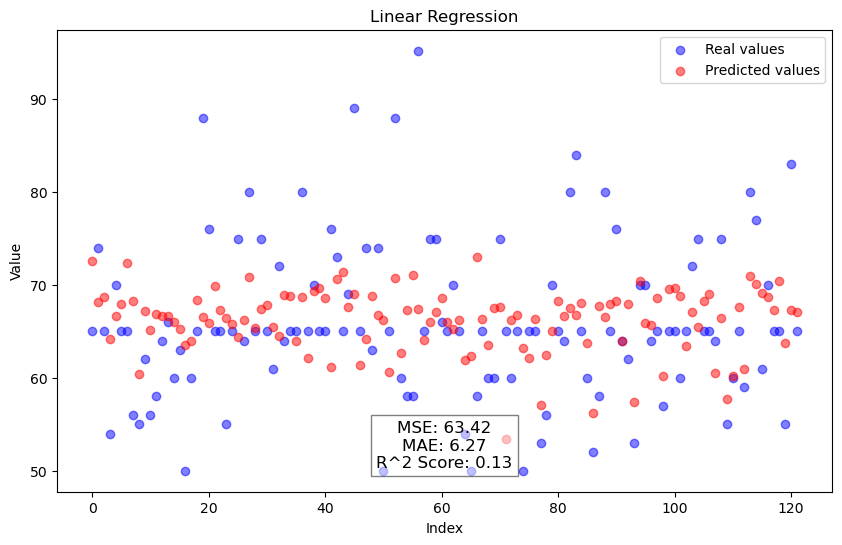


SVR:
MSE: 66.59
R^2 Score: 0.09


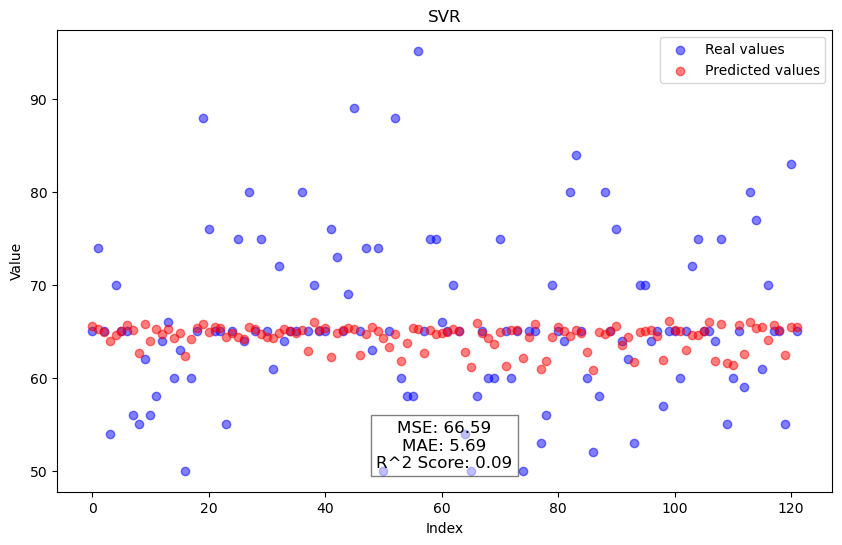


Decision Tree:
MSE: 130.00
R^2 Score: -0.77


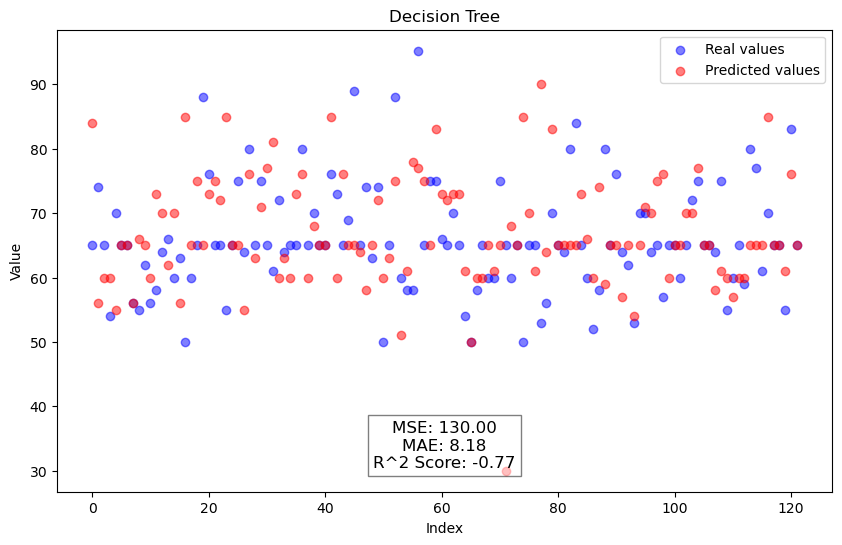


Random Forest:
MSE: 65.12
R^2 Score: 0.11


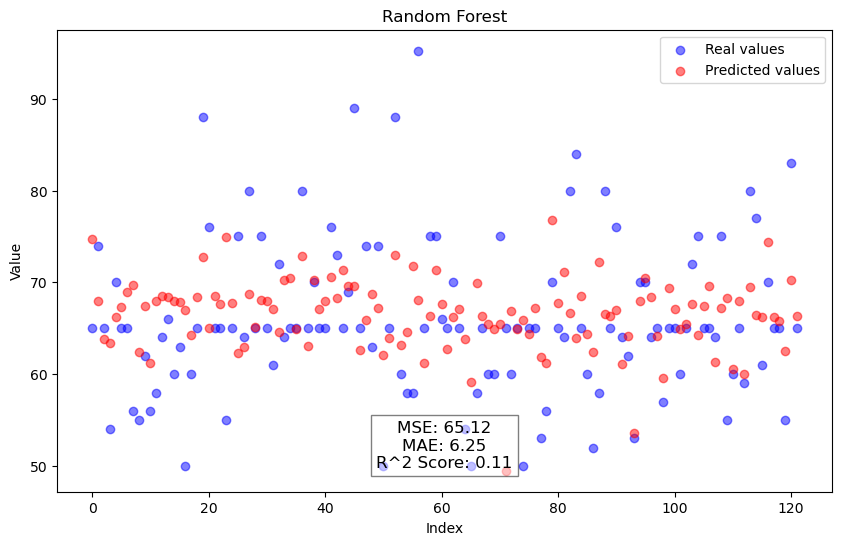

In [ ]:

# Definir características y objetivo
features = df_encoded_nom.drop(columns=[columnas_numericas[1]])
X = features
y1 = df_encoded_nom[columnas_numericas[1]]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=42)

""" # Crear pipelines para cada modelo
models = [
    ('Linear Regression', Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())])),
    ('SVR', Pipeline([('scaler', StandardScaler()), ('regressor', SVR())])),
    ('Decision Tree', Pipeline([('regressor', DecisionTreeRegressor())])),
    ('Random Forest', Pipeline([('regressor', RandomForestRegressor())]))
]
 """
models = [
    ('Linear Regression', Pipeline([('regressor', LinearRegression())])),
    ('SVR', Pipeline([('regressor', SVR())])),
    ('Decision Tree', Pipeline([('regressor', DecisionTreeRegressor())])),
    ('Random Forest', Pipeline([('regressor', RandomForestRegressor())]))
]

# Función para graficar y evaluar modelos
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_true)), y_true, label='Real values', color='blue', alpha=0.5)
    plt.scatter(range(len(y_pred)), y_pred, label='Predicted values', color='red', alpha=0.5)
    plt.title(f'{model_name}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()

    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    plt.text(0.5, 0.1, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR^2 Score: {r2:.2f}', 
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

# Entrenar y evaluar modelos
for name, pipeline in models:
    pipeline.fit(X_train, y1_train)
    y1_pred = pipeline.predict(X_test)
    print(f"\n{name}:\nMSE: {mean_squared_error(y1_test, y1_pred):.2f}\nR^2 Score: {r2_score(y1_test, y1_pred):.2f}")
    plot_predictions(y1_test, y1_pred, name)
